# ShapeNet

## Dataset

In [1]:
import torch
from torch import nn
from torch import optim
import os
import os.path as osp

import pytorch_lightning as pl

from torch.utils.data import DataLoader
from data.ShapeNet.ShapeNetDataLoader import PartNormalDataset

from pytorch_lightning.loggers import WandbLogger

KeyboardInterrupt: 

In [2]:
category = 'Airplane'
fixed_points = 256
num_workers = 10
path = osp.realpath(osp.join('..', 'data', 'ShapeNet/raw'))

test_dataset = PartNormalDataset(root=path, npoints=fixed_points, split='test', class_choice=category)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=num_workers)

In [ ]:
from hpcs.utils.viz import plot_cloud

In [ ]:
cloud = test_dataset.__getitem__(1)

In [ ]:
points, label, targets = cloud

In [ ]:
plotter = plot_cloud(xyz=points, scalars=targets, point_size=3.0, notebook=True)

## Model

In [3]:
import wandb
import yaml
from test import configure

In [4]:
os.remove(os.path.join(os.getcwd(), 'config.yaml'))

In [5]:
os.remove(os.path.join(os.getcwd(), 'model.ckpt'))

In [6]:
config_yaml = wandb.restore(name='config.yaml', run_path='pierreoo/HPCS/runs/1mxfonx9')
config = yaml.load(config_yaml, Loader=yaml.FullLoader)

In [7]:
model, trainer = configure(config)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Gpu:  0


In [8]:
wandb.restore('model.ckpt', run_path='pierreoo/HPCS/runs/1mxfonx9')
model = model.load_from_checkpoint('model.ckpt')

Testing: 0it [00:00, ?it/s]

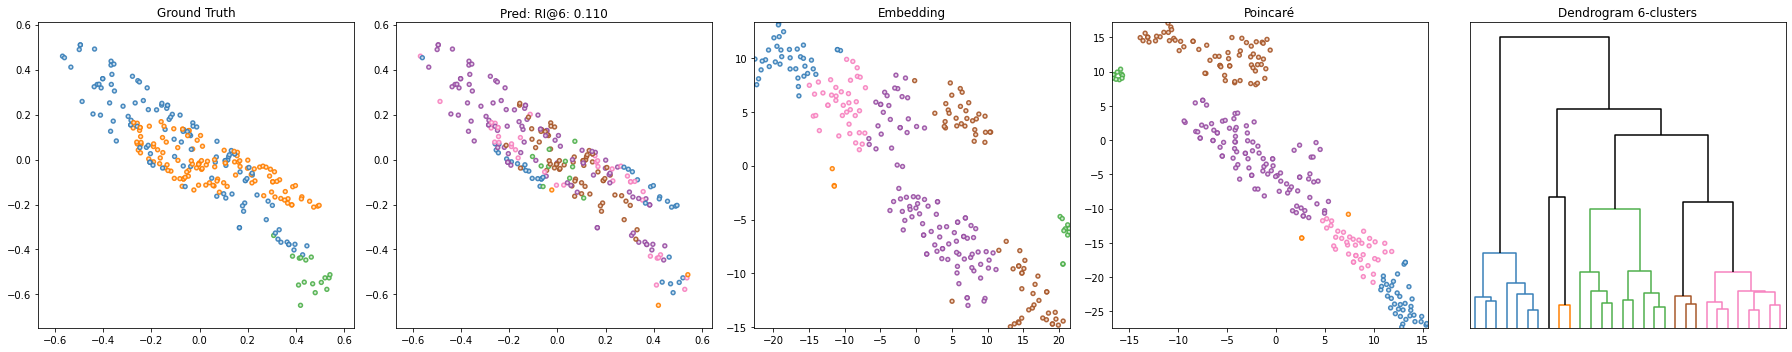

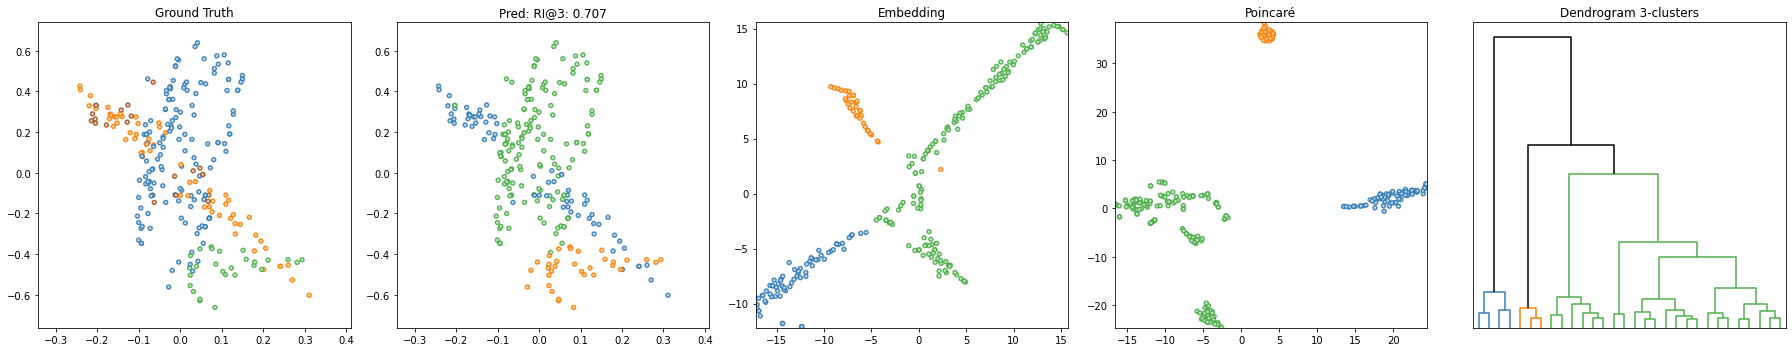

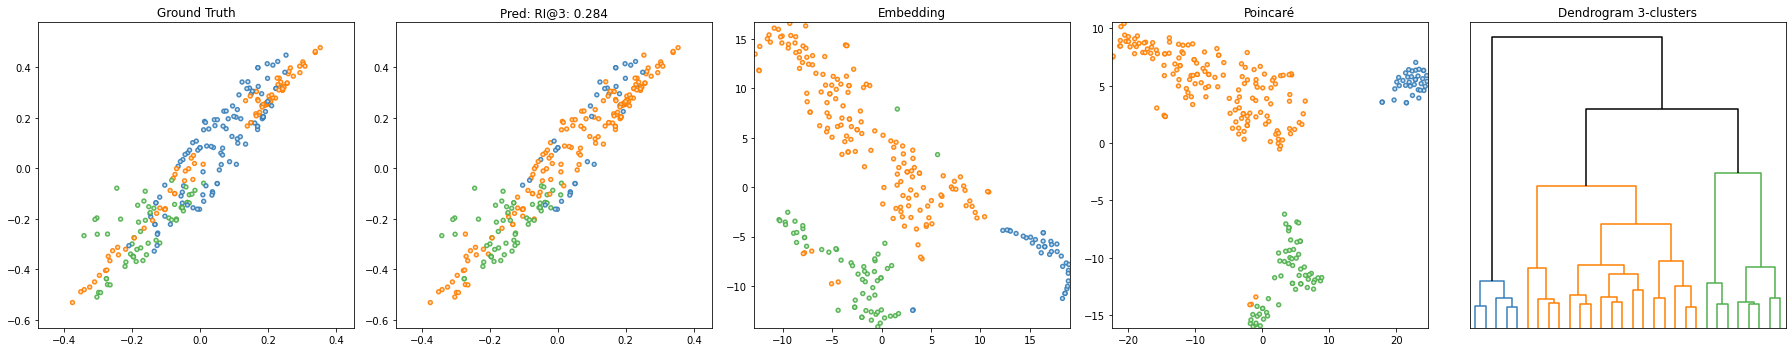

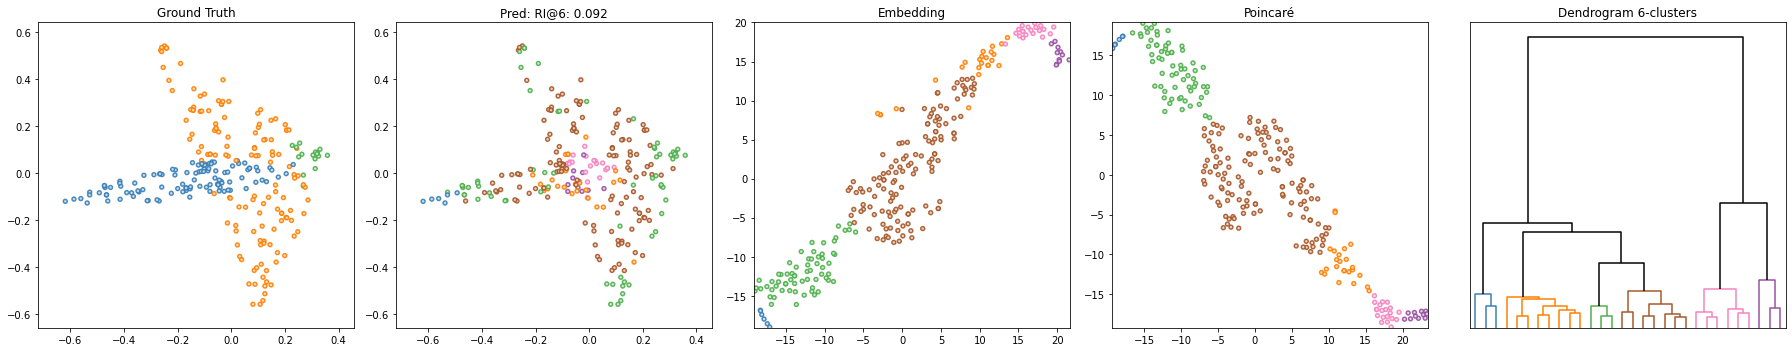

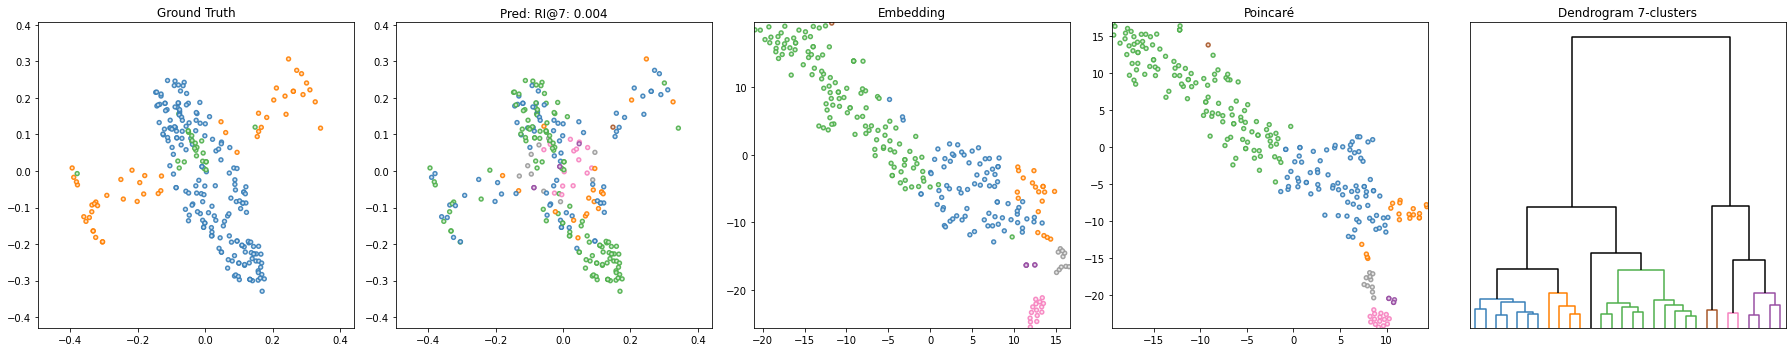

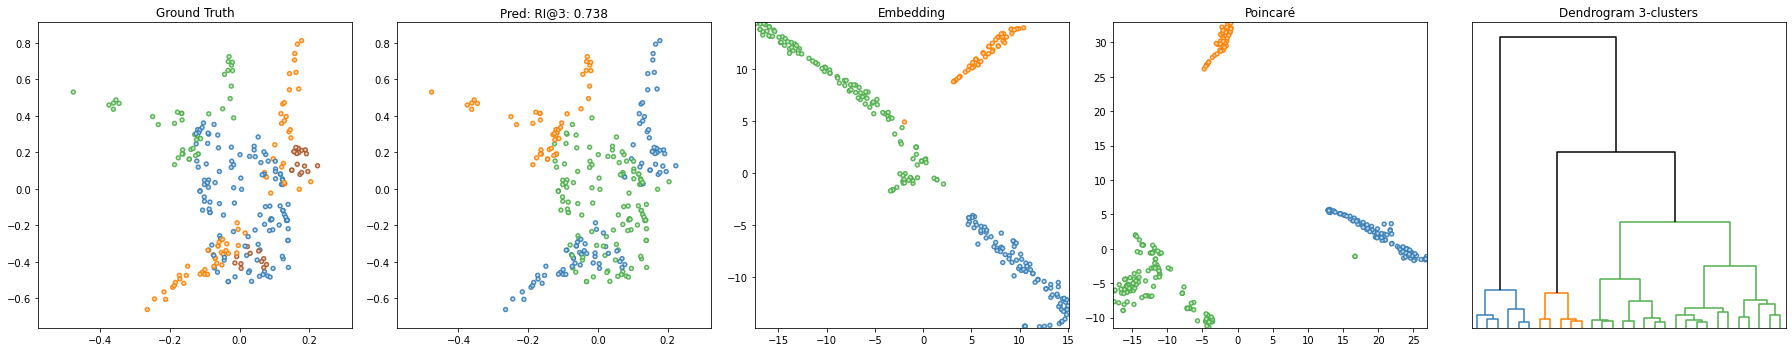

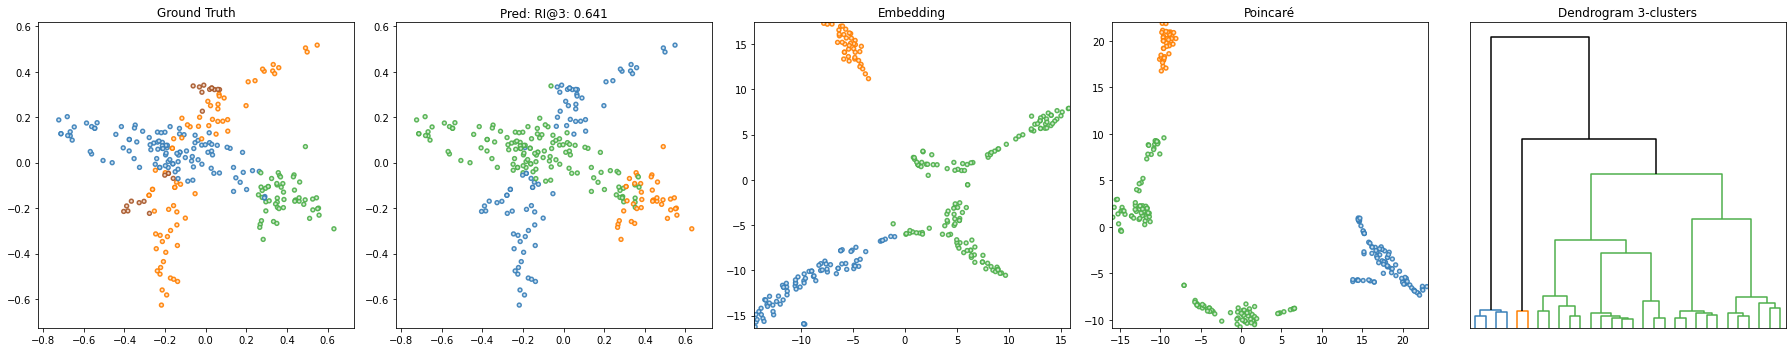

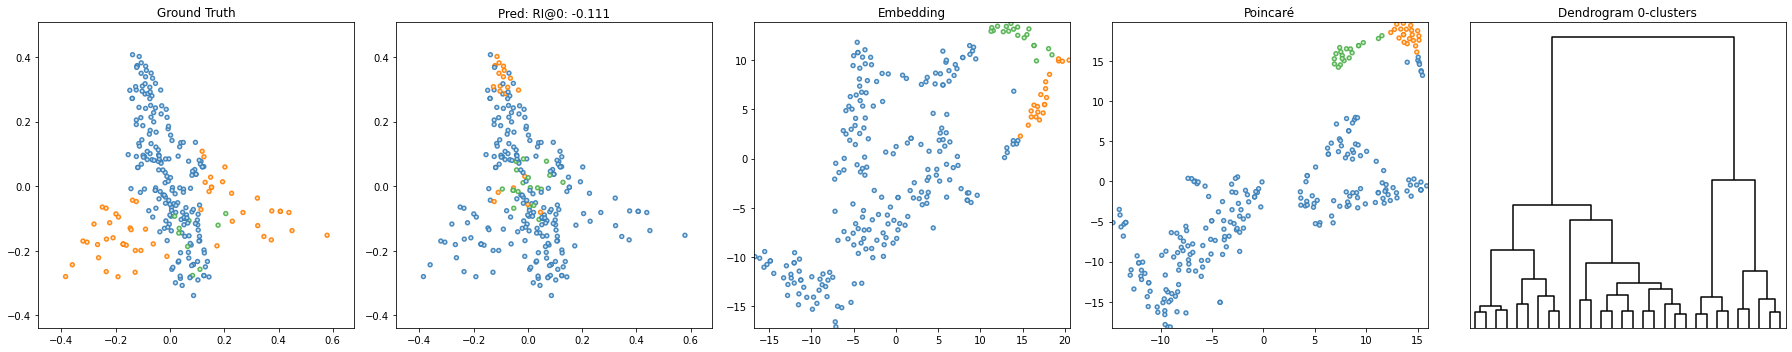

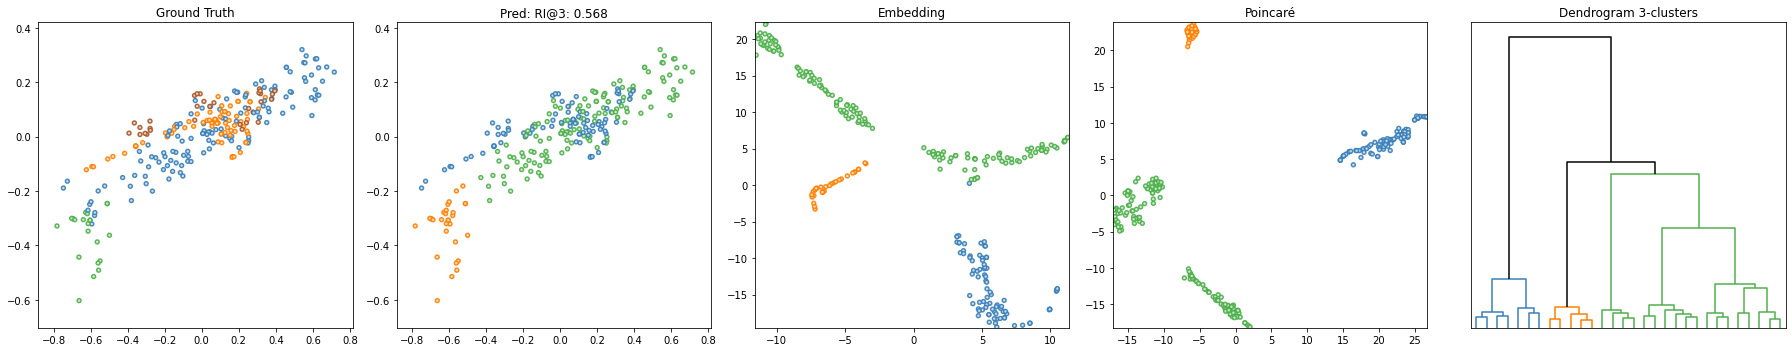

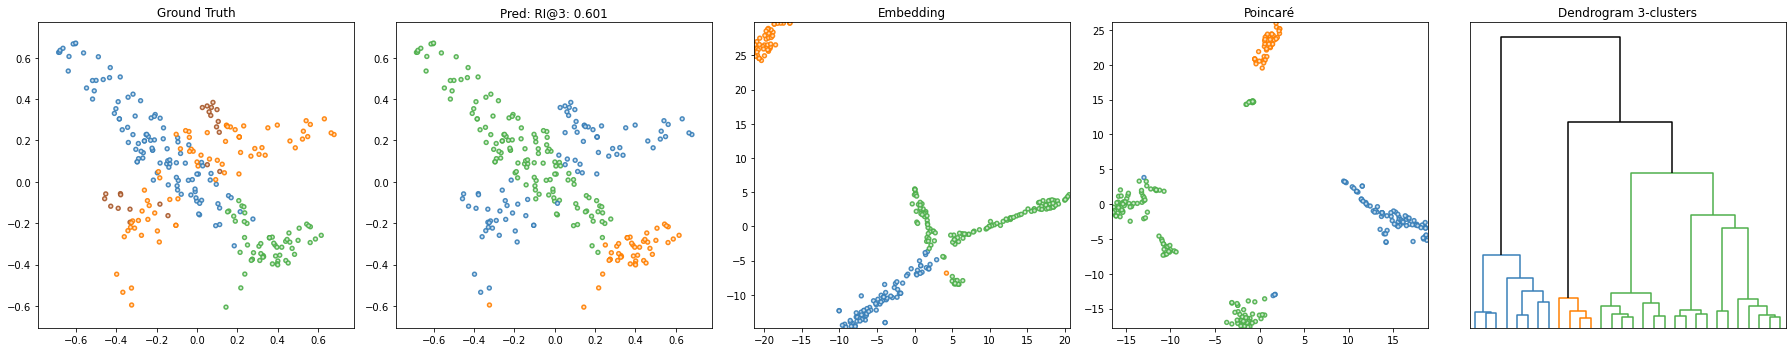

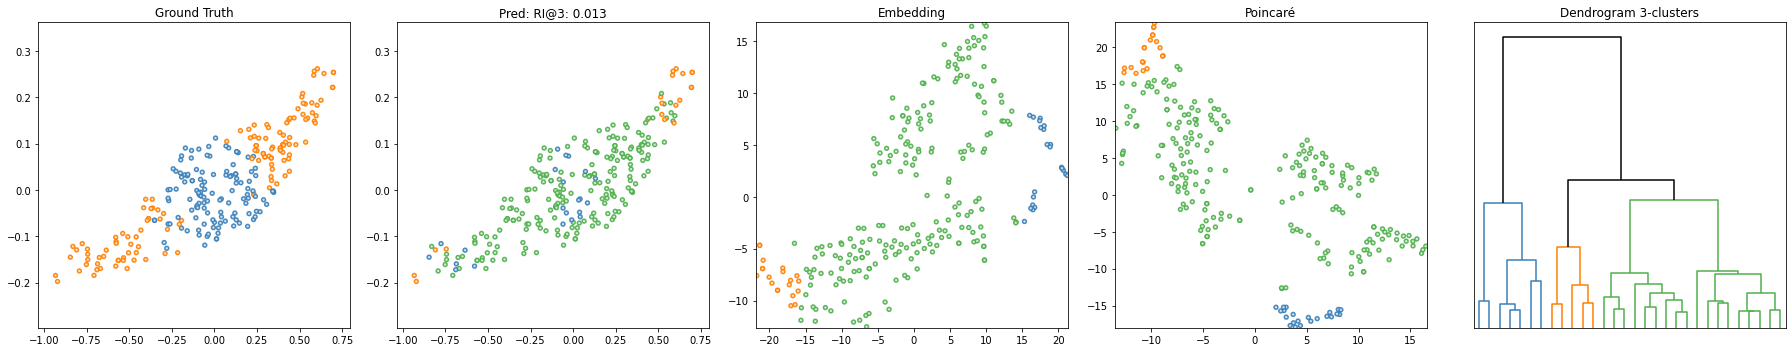

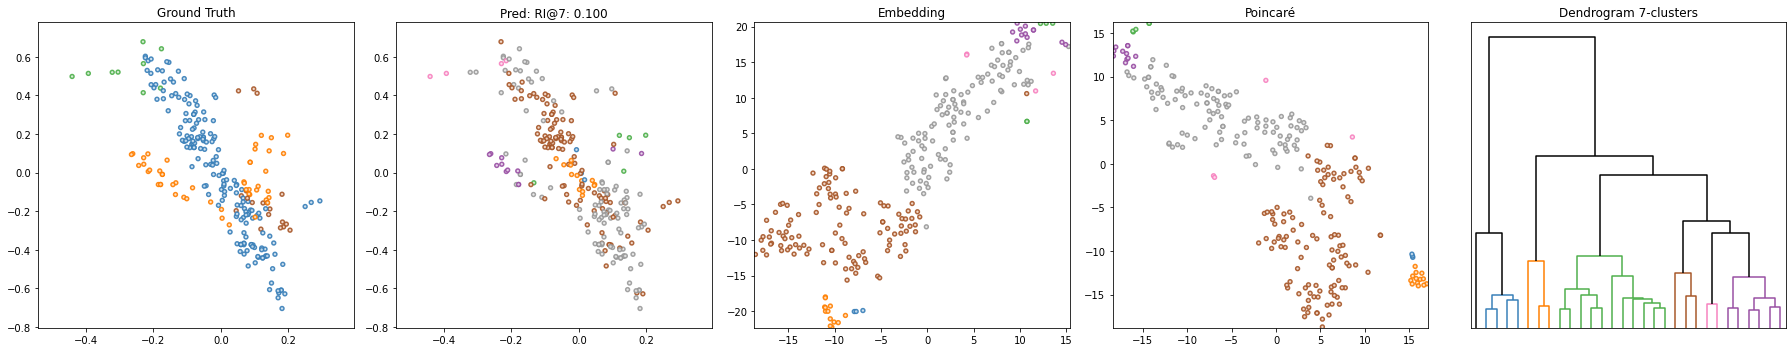

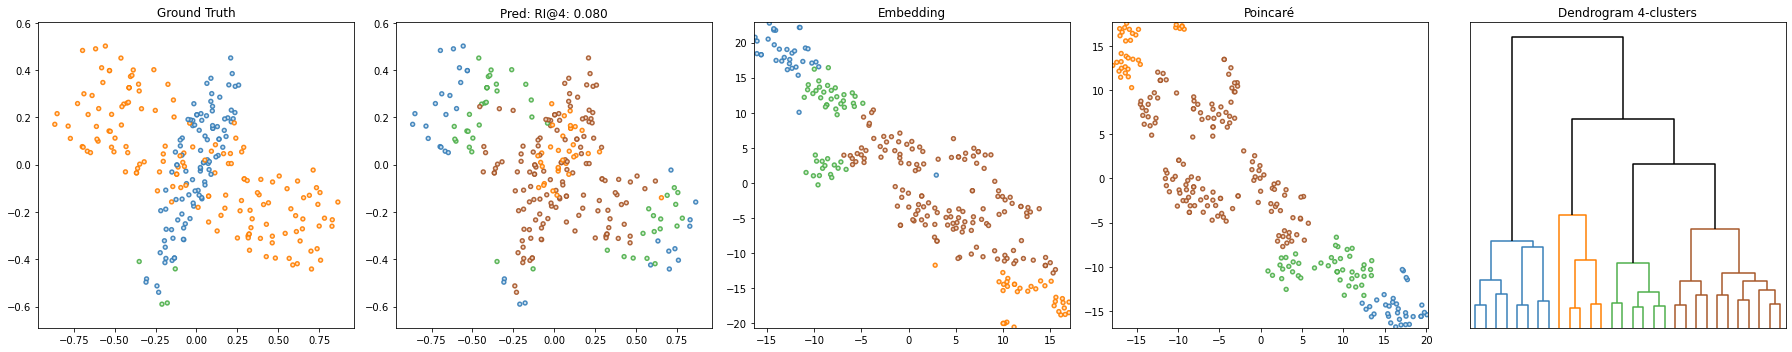

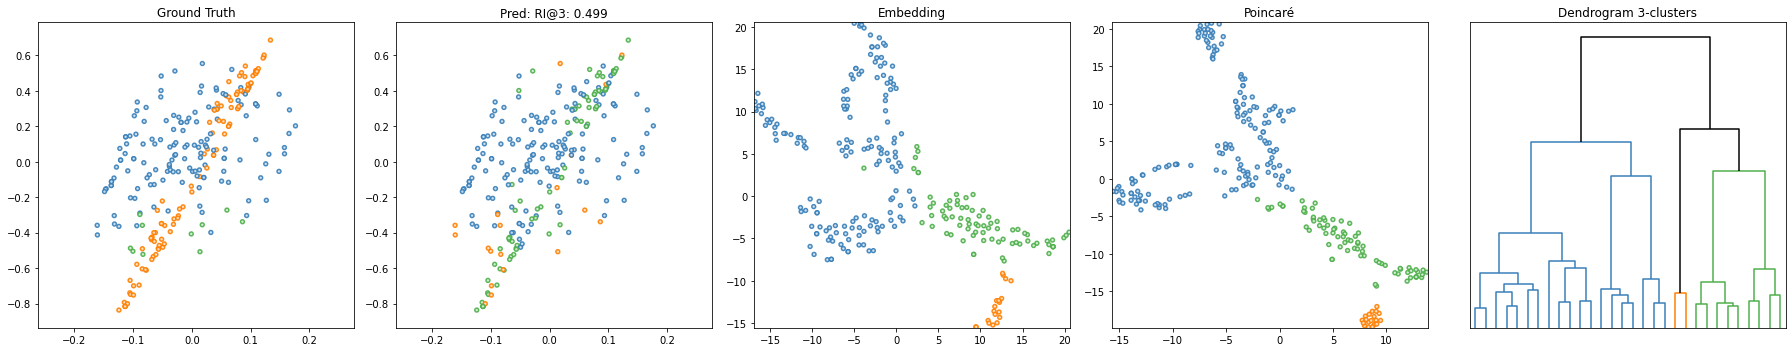

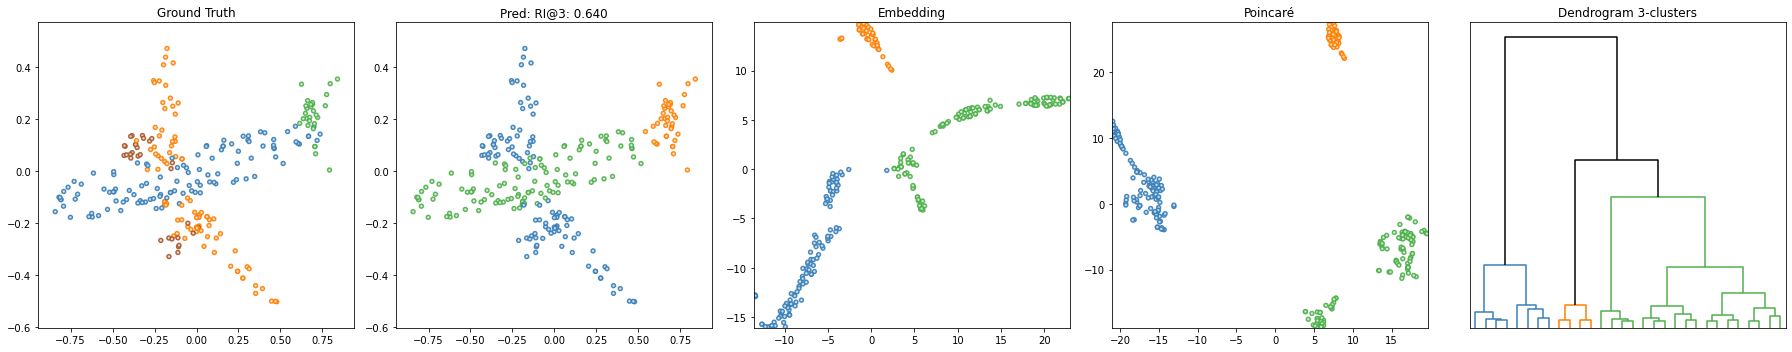

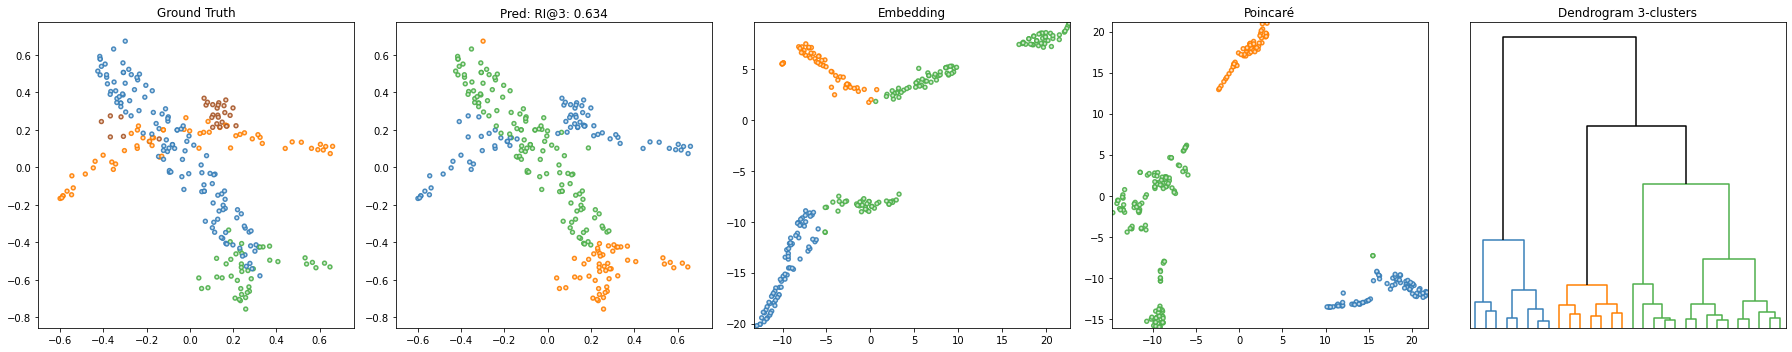

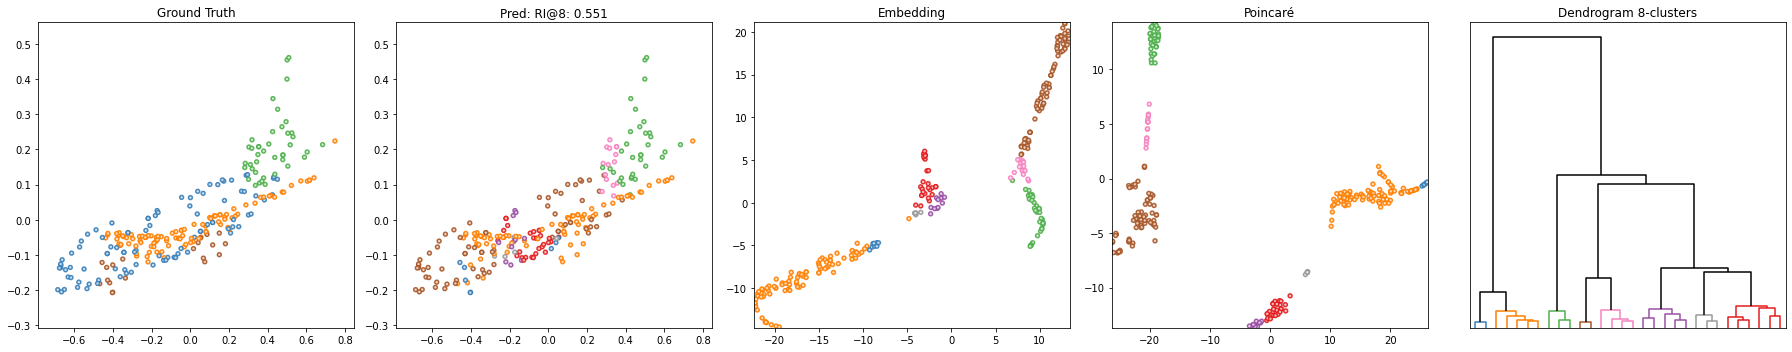

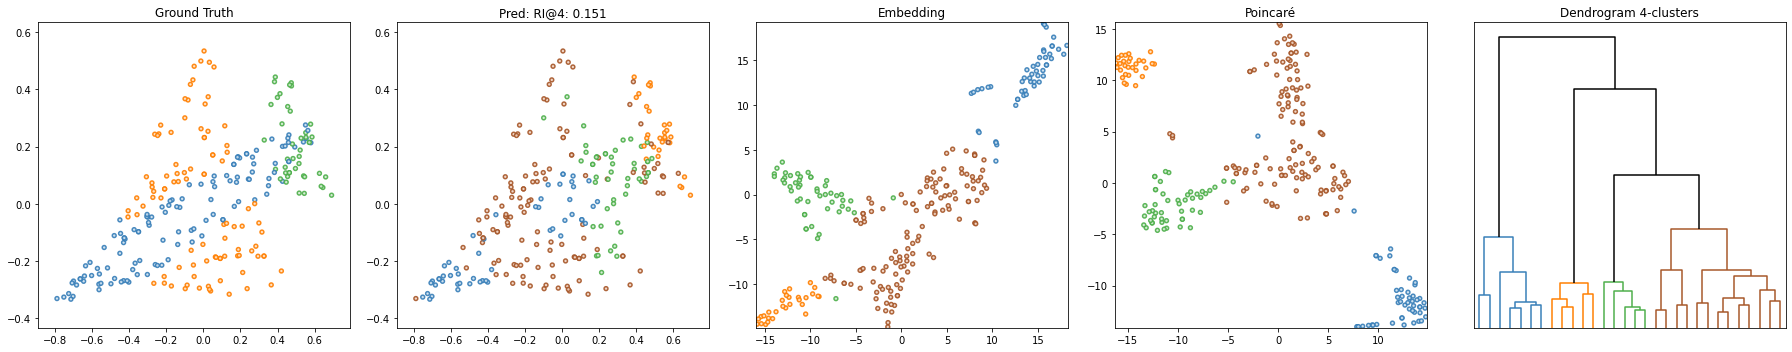

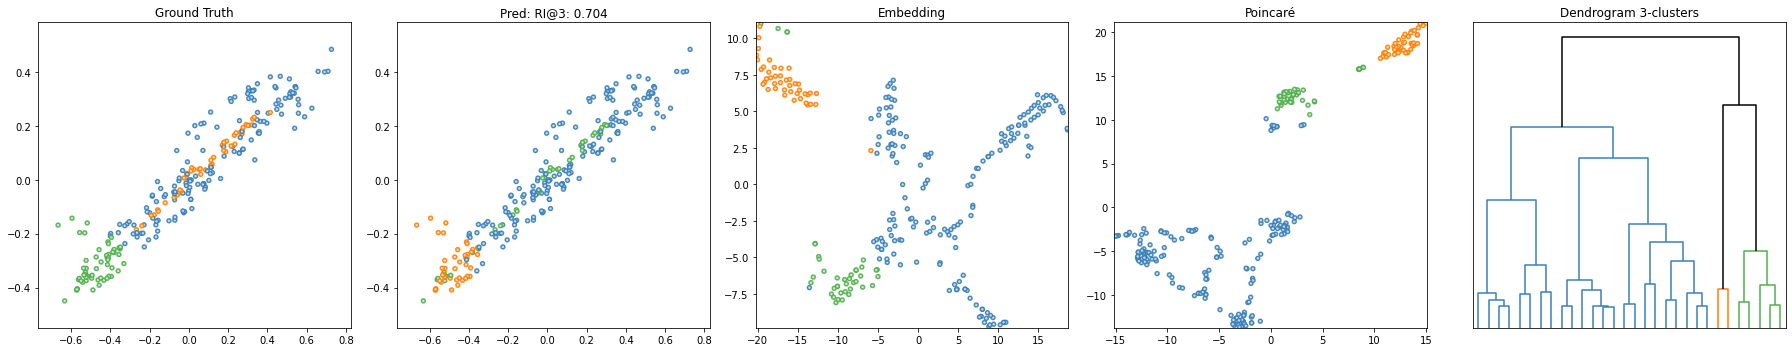

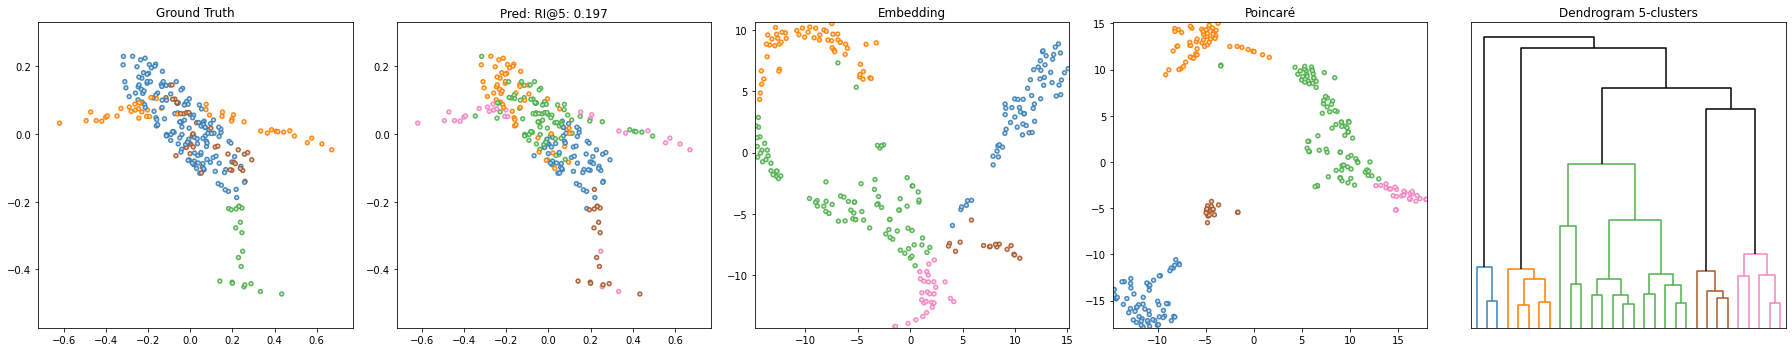

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss            2.412227153778076
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 2.412227153778076}]

In [9]:
trainer.test(model, test_loader)

In [10]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

temperature tensor([0.2823])
scale tensor([0.8391])
model.bn7.weight tensor([0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245])
model.bn7.bias tensor([-1.6222e-04, -1.2979e-04, -1.0707e-04, -1.0864e-04,  1.2332e-04,
        -8.5434e-05,  4.3172e-04, -1.0047e-04, -2.1974e-05, -2.4062e-04,
        -1.0638e-04, -2.4084e-04, -1.0885e-04, -1.7486e-04, -6.2997e-05,
        -1.7243e-04,  3.8345e-04, -5.6085e-05, -6.0282e-05, -2.4113e-04,
        -1.3235e-04,  5.3451e-04,  8.6093e-04, 